In [1]:
from samana.Data.j1537 import J1537_HST
from samana.Model.j1537_model import J1537ModelEPLM3M4Shear
import numpy as np
import matplotlib.pyplot as plt
from lenstronomy.Workflow.fitting_sequence import FittingSequence
from lenstronomy.Data.coord_transforms import Coordinates

In [6]:
data = J1537_HST()
model = J1537ModelEPLM3M4Shear(data, shapelets_order=8)
kwargs_lens_macro_init = None

kwargs_model, _, _, _, _ = model.setup_kwargs_model(kwargs_lens_macro_init=kwargs_lens_macro_init)
kwargs_params = model.kwargs_params(kwargs_lens_macro_init=kwargs_lens_macro_init)
kwargs_likelihood = model.kwargs_likelihood
fitting_sequence = FittingSequence(data.kwargs_data_joint, kwargs_model, model.kwargs_constraints, 
                                  kwargs_likelihood, kwargs_params)
nthreads = 8
fitting_kwargs_list = [
        ['update_settings', {'lens_add_fixed': [[0, ['a3_a', 'a4_a', 'a1_a'], [0.0, 0.0, 0.0, 0.0, 0.0]]]}],
        ['PSO', {'sigma_scale': 1., 'n_particles': 20, 'n_iterations': 200, 'threadCount': nthreads}],
        #['psf_iteration', {'psf_symmetry': 4, 'keep_psf_error_map': True, 'num_iter': 25}],
        #['PSO', {'sigma_scale': 1., 'n_particles': 50, 'n_iterations': 100, 'threadCount': nthreads}],
        #['psf_iteration', {'psf_symmetry': 4, 'keep_psf_error_map': True, 'num_iter': 25}],
        #['MCMC', {'n_burn': 100, 'n_run': 50, 'walkerRatio': 4, 'sigma_scale': 0.1, 'threadCount': nthreads}]
                          ]
chain_list = fitting_sequence.fit_sequence(fitting_kwargs_list)
kwargs_result = fitting_sequence.best_fit()

Computing the PSO ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [01:33<00:00,  2.14it/s]

Max iteration reached! Stopping.
-1.304378042775339 reduced X^2 of best position
-7434.954843819432 log likelihood
11400 effective number of data points
[{'theta_E': 1.399592714770715, 'gamma': 2.148484337674527, 'e1': -0.0013822312576579811, 'e2': 0.022591381219755447, 'center_x': -0.022967680274305173, 'center_y': 0.018896308612486302, 'a1_a': 0.0, 'delta_phi_m1': 0.2209699133753447, 'a3_a': 0.0, 'delta_phi_m3': 0.06430695040625804, 'a4_a': 0.0, 'delta_phi_m4': 0.8122184298925543}, {'gamma1': 0.0866135803635328, 'gamma2': -0.1417040053348373, 'ra_0': 0.0, 'dec_0': 0.0}] lens result
[{'amp': 1, 'R_sersic': 6.427497365179052, 'n_sersic': 3.6888414774081197, 'e1': -0.4021328454792318, 'e2': 0.499910968644894, 'center_x': -0.025091239094330496, 'center_y': 0.056711213826615064}, {'amp': 1, 'n_max': 8, 'beta': 0.0663820587568888, 'center_x': -0.025091239094330496, 'center_y': 0.056711213826615064}] source result
[{'amp': 1, 'R_sersic': 5.939997804116409, 'n_sersic': 9.999743019673778, 'e1

-1.2943663393404976 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.2943663393405935
(25, ['gamma_lens0', 'delta_phi_m1_lens0', 'delta_phi_m3_lens0', 'delta_phi_m4_lens0', 'gamma1_lens1', 'gamma2_lens1', 'R_sersic_source_light0', 'n_sersic_source_light0', 'e1_source_light0', 'e2_source_light0', 'beta_source_light1', 'R_sersic_lens_light0', 'n_sersic_lens_light0', 'e1_lens_light0', 'e2_lens_light0', 'center_x_lens_light0', 'center_y_lens_light0', 'delta_x_image', 'delta_x_image', 'delta_x_image', 'delta_x_image', 'delta_y_image', 'delta_y_image', 'delta_y_image', 'delta_y_image'])


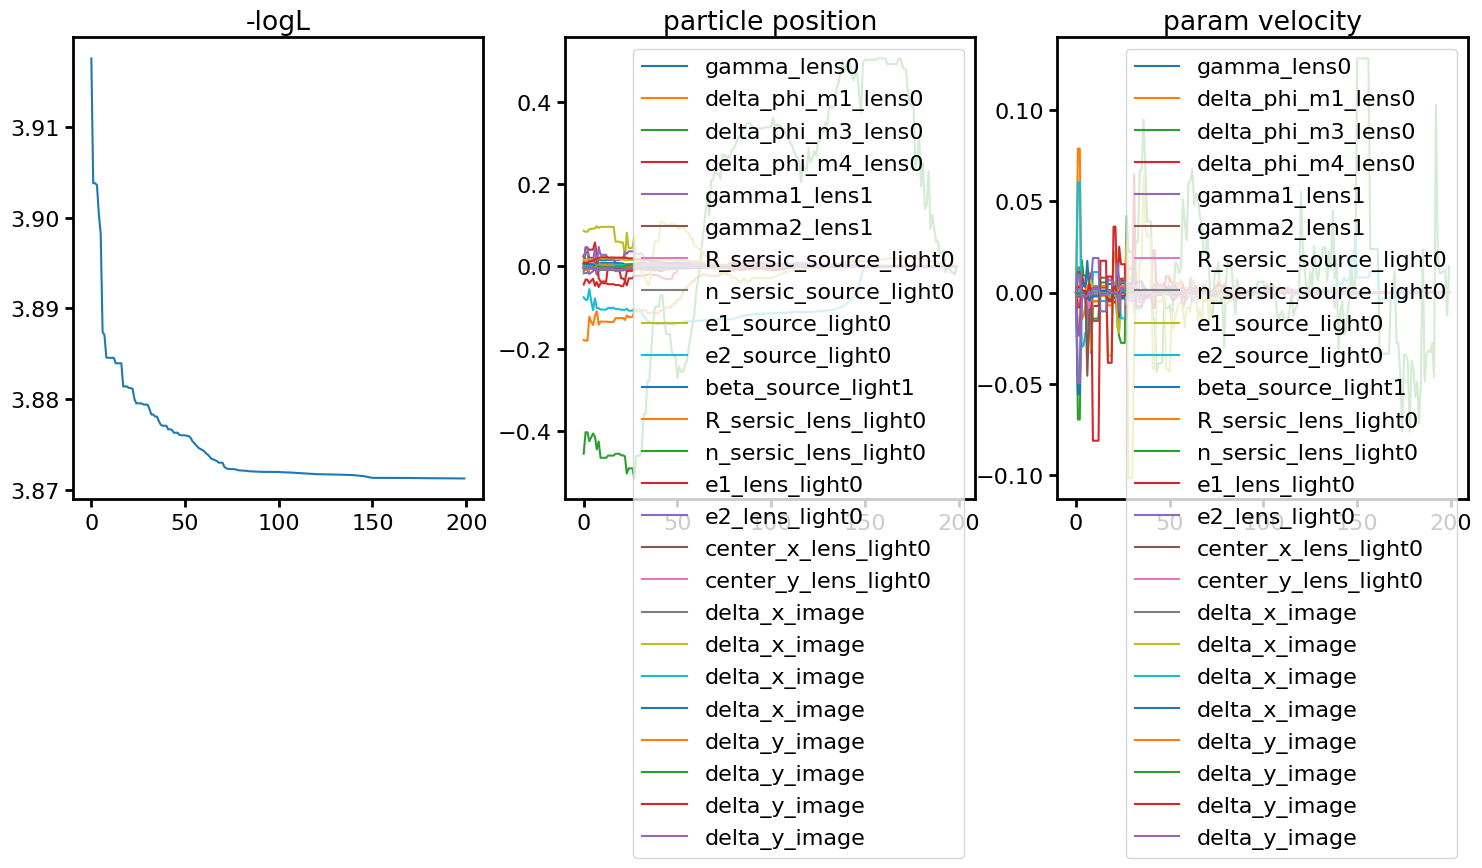

<Figure size 640x480 with 0 Axes>

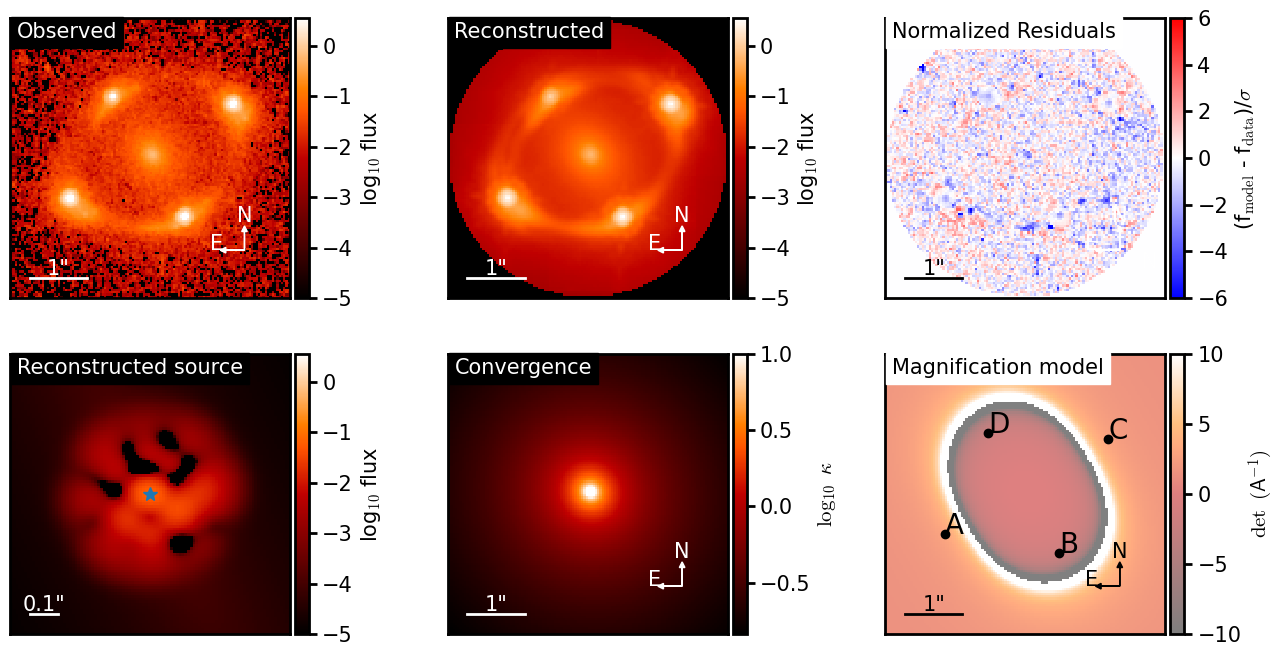

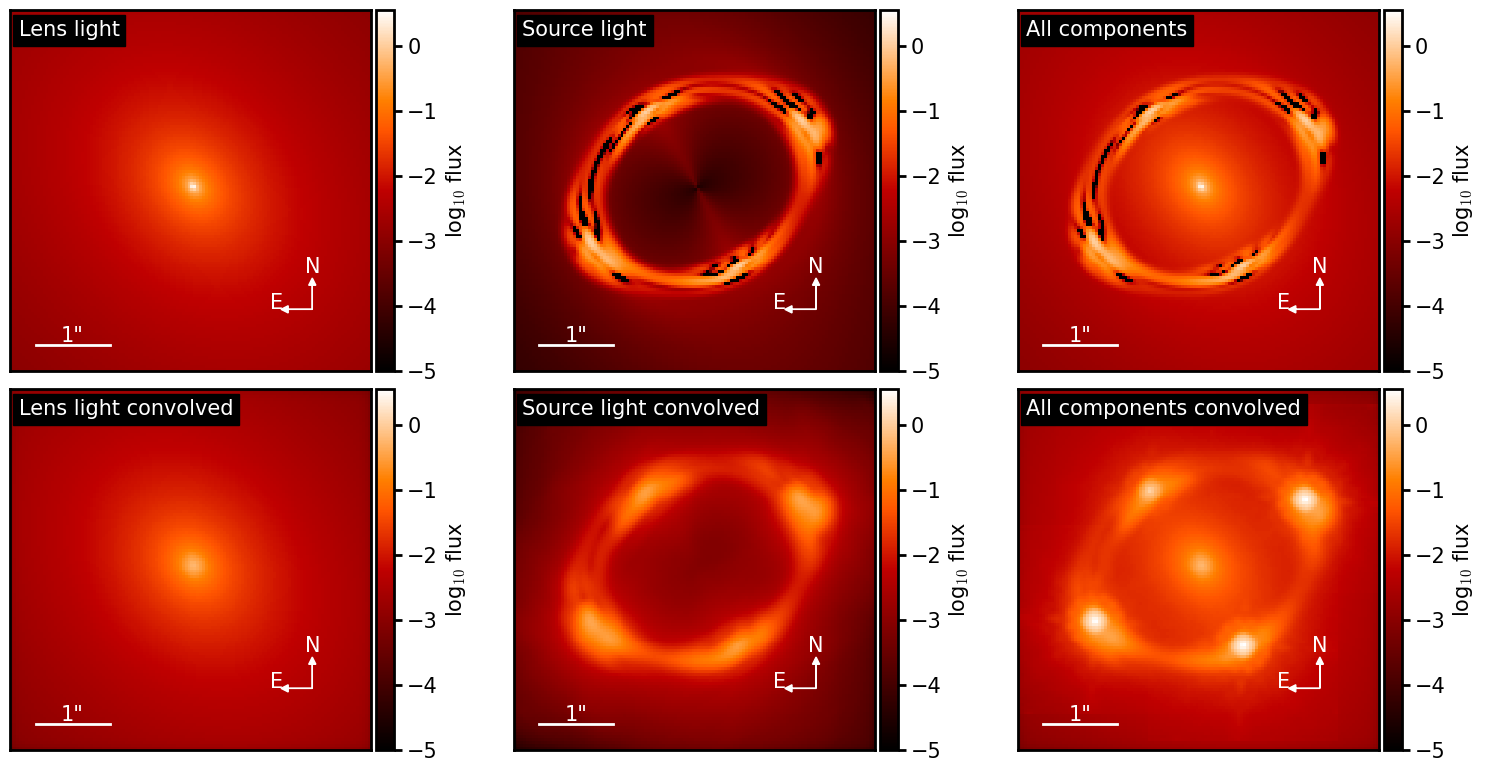

[{'theta_E': 1.399592714770715, 'gamma': 2.148484337674527, 'e1': -0.0013822312576579811, 'e2': 0.022591381219755447, 'center_x': -0.022967680274305173, 'center_y': 0.018896308612486302, 'a1_a': 0.0, 'delta_phi_m1': 0.2209699133753447, 'a3_a': 0.0, 'delta_phi_m3': 0.06430695040625804, 'a4_a': 0.0, 'delta_phi_m4': 0.8122184298925543}, {'gamma1': 0.0866135803635328, 'gamma2': -0.1417040053348373, 'ra_0': 0.0, 'dec_0': 0.0}]
[{'amp': 0.011492673273285915, 'R_sersic': 6.427497365179052, 'n_sersic': 3.6888414774081197, 'e1': -0.4021328454792318, 'e2': 0.499910968644894, 'center_x': -0.025091239094330496, 'center_y': 0.056711213826615064}, {'amp': array([ 714.18020642, -123.15898495, -234.3917337 ,   71.81687519,
         88.35863144,  -90.59372293, -146.42130463, -185.2947603 ,
         34.73548296,  -31.90003265,  167.604197  ,   51.74524352,
        141.2775339 , -102.73787652,  170.62658274,  -57.18390663,
         37.41164871,   71.5280403 ,   68.14022114,   40.21136261,
        -14.417

In [7]:
from lenstronomy.Plots.model_plot import ModelPlot
from lenstronomy.Plots import chain_plot
import matplotlib.pyplot as plt

from palettable.cartocolors.qualitative import Vivid_10 as cmap
#from palettable.scientific.sequential import Oslo_20 as cmap 
#from palettable.mycarta import LinearL_10 as cmap
# from palettable.scientific.diverging import Vik_20 as cmap
# from palettable.cmocean.sequential import Thermal_20 as cmap
# cmap = cmap.get_mpl_colormap()

multi_band_list = data.kwargs_data_joint['multi_band_list']
modelPlot = ModelPlot(multi_band_list, kwargs_model, kwargs_result, arrow_size=0.02, cmap_string='gist_heat',
                      image_likelihood_mask_list=[data.likelihood_mask],fast_caustic=True)

param_class = fitting_sequence.param_class
print(param_class.num_param())
#print(chain_list)

for i in range(len(chain_list)):
    chain_plot.plot_chain_list(chain_list, i)

f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

modelPlot.data_plot(ax=axes[0,0],cmap='bone')
modelPlot.model_plot(ax=axes[0,1])
modelPlot.normalized_residual_plot(ax=axes[0,2], v_min=-6, v_max=6)
modelPlot.source_plot(ax=axes[1, 0], deltaPix_source=0.01, numPix=100)
modelPlot.convergence_plot(ax=axes[1, 1], v_max=1)
modelPlot.magnification_plot(ax=axes[1, 2])
#f.tight_layout()
#f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0., hspace=0.05)
#plt.show()

f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

modelPlot.decomposition_plot(ax=axes[0,0], text='Lens light', lens_light_add=True, unconvolved=True)
modelPlot.decomposition_plot(ax=axes[1,0], text='Lens light convolved', lens_light_add=True)
modelPlot.decomposition_plot(ax=axes[0,1], text='Source light', source_add=True, unconvolved=True)
modelPlot.decomposition_plot(ax=axes[1,1], text='Source light convolved', source_add=True)
modelPlot.decomposition_plot(ax=axes[0,2], text='All components', source_add=True, lens_light_add=True, unconvolved=True)
modelPlot.decomposition_plot(ax=axes[1,2], text='All components convolved', source_add=True, lens_light_add=True, point_source_add=True)
f.tight_layout()
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0., hspace=0.05)
plt.show()

#print(kwargs_result)
print(kwargs_result['kwargs_lens'])
print(kwargs_result['kwargs_source'])
print(kwargs_result['kwargs_lens_light'])

-1.2943663393404976 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.2943663393405935


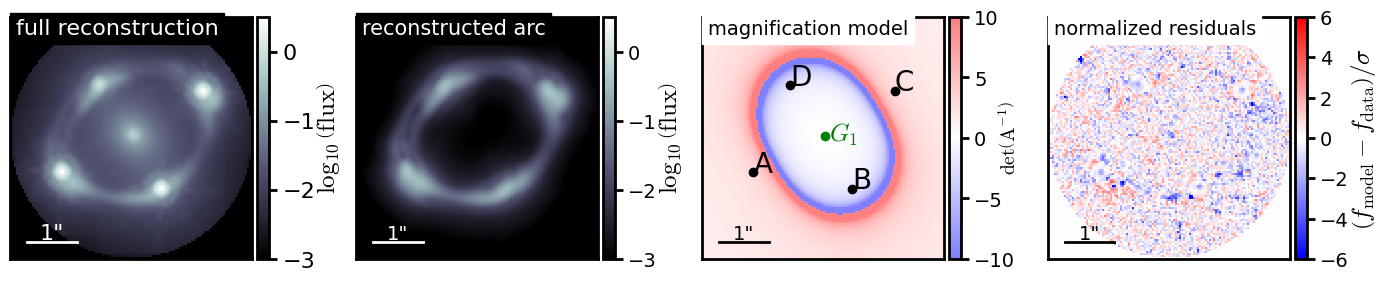

In [8]:
plt.rcParams['axes.linewidth'] = 2.
plt.rcParams['xtick.major.width'] = 2.
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.minor.width'] = 1.0
plt.rcParams['xtick.minor.size'] = 3.5
plt.rcParams['ytick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.minor.width'] = 1.0
plt.rcParams['ytick.minor.size'] = 3.5
plt.rcParams.update({'font.size': 16})
plt.rcParams['mathtext.fontset'] = 'cm'

modelPlot = ModelPlot(multi_band_list, kwargs_model, kwargs_result, arrow_size=0.02, cmap_string="bone",
                      image_likelihood_mask_list=[data.likelihood_mask],fast_caustic=True)

fig = plt.figure(1)
fig.set_size_inches(14,4.5)

ax1 = plt.subplot(141)
modelPlot._arrow_size = 0
v_min = -3.
v_max = v_min + 3.5
modelPlot.model_plot(ax=ax1,
                    v_min=v_min,v_max=v_max,text='full reconstruction',font_size=16,no_arrow=True)
im = ax1.images
cb = im[-1].colorbar 
cb.set_label(r'$\log_{10}\left(\rm{flux}\right)$',labelpad=0,fontsize=18)


ax2 = plt.subplot(142)
modelPlot._arrow_size = 0
modelPlot.decomposition_plot(ax=ax2, text='reconstructed arc', unconvolved=False, 
                             source_add=True, v_min=v_min, v_max=v_max,cmap='bone',
                             font_size=14,no_arrow=True)
im = ax2.images
cb = im[-1].colorbar 
#cb.set_ticklabels(ticks,fontsize=16)
cb.set_label(r'$\log_{10}\left(\rm{flux}\right)$',labelpad=0,fontsize=18)

ax3 = plt.subplot(143)
modelPlot._arrow_size = 0
v_min = -3
v_max = v_min + 3.
modelPlot.magnification_plot(ax=ax3, cmap='bwr', text='magnification model', font_size=14,
                            no_arrow=True)
im = ax3.images
cb = im[-1].colorbar 
cb.set_label(r'$\rm{det}\left(A^{-1}\right)$',labelpad=-12)

satx = kwargs_result['kwargs_lens'][0]['center_x']
saty = kwargs_result['kwargs_lens'][0]['center_y']
xplot, yplot = data.coordinate_system.map_coord2pix(satx, saty)
pixel_width = data.coordinate_system.pixel_width
origin = [0,0]
x_ = xplot * pixel_width + origin[0]
y_ = yplot * pixel_width + origin[1]
ax3.plot(x_, y_, ".", color='g',markersize=12,alpha=1.)
ax3.text(x_+0.08, y_-0.1, r'$G_1$', fontsize=18, color='g')

# satx = kwargs_result['kwargs_lens'][2]['center_x']
# saty = kwargs_result['kwargs_lens'][2]['center_y']
# xplot, yplot = data.coordinate_system.map_coord2pix(satx, saty)
# pixel_width = data.coordinate_system.pixel_width
# origin = [0,0]
# x_ = xplot * pixel_width + origin[0]
# y_ = yplot * pixel_width + origin[1]
# ax3.plot(x_, y_, ".", color='g',markersize=16,alpha=1.)
# ax3.text(x_-0.6, y_-0.15, r'$G_2$', fontsize=16, color='g')


ax4 = plt.subplot(144)
modelPlot._arrow_size = 0
v_min = -3
v_max = v_min + 3.
modelPlot.normalized_residual_plot(ax=ax4,
                    cmap='bwr',font_size=14, text='normalized residuals')
im = ax4.images
cb = im[-1].colorbar 
cb.set_label(r'$\left(f_{\rm{model}}-f_{\rm{data}}\right)/\sigma$',labelpad=0,fontsize=18)

plt.subplots_adjust(wspace=-0.43, hspace=0.1)
plt.tight_layout()

#plt.savefig('../bmodel_figures/1537bmodel.pdf',bbox_inches='tight')

median:  -523.3007695701972
standard dev:  121.2729216385587


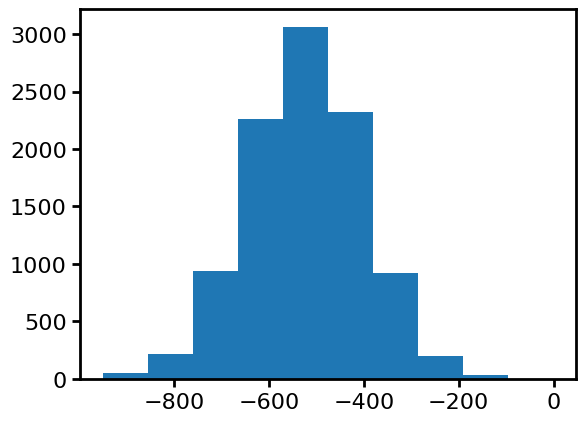

In [5]:
from lenstronomy.Util.class_creator import create_image_model 
import lenstronomy.Util.image_util as image_util

kwargs_data = data.kwargs_data
kwargs_psf = data.kwargs_psf
kwargs_numerics = data.kwargs_numerics 
image_model = create_image_model(kwargs_data, kwargs_psf, kwargs_numerics, kwargs_model)
likelihood_mask = data.likelihood_mask_imaging_weights
image_sim_no_noise = image_model.image(kwargs_result['kwargs_lens'], 
                              kwargs_result['kwargs_source'], 
                              kwargs_result['kwargs_lens_light'], 
                              kwargs_result['kwargs_ps'])
logL_list = []
model_error = image_model._error_map_model(
            kwargs_result['kwargs_lens'], kwargs_ps=kwargs_result['kwargs_ps'], kwargs_special=kwargs_result['kwargs_special']
        )
for i in range(0, 10000):
    poisson = image_util.add_poisson(image_sim_no_noise, exp_time=data.kwargs_data['exposure_time'])
    poisson = 0
    bkg = image_util.add_background(image_sim_no_noise, sigma_bkd=data.kwargs_data['background_rms'])
    noise_map = bkg + poisson
    image_sim = image_sim_no_noise + noise_map
    logL = image_model.Data.log_likelihood(image_sim_no_noise + noise_map, likelihood_mask, model_error)
    logL_list.append(logL)
    
max_logL = np.max(logL_list)
logL_list = np.array(logL_list) - max_logL
_ = plt.hist(logL_list)
print('median: ', np.median(logL_list))
print('standard dev: ', np.std(logL_list))